In [2]:
!cat bible.txt | ./egrep.py "[0-9]"| ./line_count.py

30711


In [3]:
!cat bible.txt | ./most_common_words.py 10

64183	the
51379	and
34746	of
13643	to
12799	that
12559	in
10263	he
9840	shall
8987	unto
8835	for


In [6]:
import csv

with open('tab_delimited_stock_prices.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        print(date, symbol, closing_price)

6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5
6/19/2014 AAPL 91.86
6/19/2014 MSFT 41.51
6/19/2014 FB 64.34


In [8]:
with open('colon_delimited_stock_prices.txt', 'r') as f:
    reader = csv.DictReader(f, delimiter=':')
    for row in reader:
        date = row['date']
        symbol = row['symbol']
        closing_price = float(row['closing_price'])
        print(date, symbol, closing_price)

6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5


In [10]:
today_prices = {'AAPL': 90.91, 'MSFT': 41.68, 'FB': 64.5}

with open('comma_delimited_stock_prices.txt', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    for stock, price in today_prices.items():
        writer.writerow([stock, price])

In [11]:
!cat comma_delimited_stock_prices.txt

In [29]:
from bs4 import BeautifulSoup
import requests
html = requests.get('http://www.example.com/').text
soup = BeautifulSoup(html, 'html5lib')

In [30]:
first_paragraph = soup.find('p')
first_paragraph == soup.p

True

In [31]:
first_paragraph_text = first_paragraph.text
first_paragraph_words = first_paragraph_text.split()
first_paragraph_words

['This',
 'domain',
 'is',
 'established',
 'to',
 'be',
 'used',
 'for',
 'illustrative',
 'examples',
 'in',
 'documents.',
 'You',
 'may',
 'use',
 'this',
 'domain',
 'in',
 'examples',
 'without',
 'prior',
 'coordination',
 'or',
 'asking',
 'for',
 'permission.']

In [32]:
all_paragraphs = soup.find_all('p')
all_paragraphs == soup('p')
paragraphs_with_ids = [p for p in all_paragraphs if p.get('id')]
paragraphs_with_ids

[]

In [34]:
important_paragraphs = soup('p', {'class': 'important'})
important_paragraphs2 = soup('p', 'important')
important_paragraphs3 = [p for p in soup('p')
                         if 'important' in p.get('class', [])]
important_paragraphs3

[]

In [36]:
# warning, will return the same span multiple times
# if it sits inside multiple divs
# be more clever if that's the case
spans_inside_divs = [span
                     for div in soup('div')   # for each <div> on the page
                     for span in div('span')] # find each <span> inside it  
spans_inside_divs

[]

In [96]:
# url has been changed
# what the semi-colon in the query string?
url = 'https://ssearch.oreilly.com/' + \
      '?i=1;page=1;q=data&act=pg_1'
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

In [97]:
articles = soup('article', 'result')
print(len(articles))

16


In [92]:
# no distinguishable element exist for a video
# detect the article is a book, not just an article, instead
def is_book(article): 
    return True if 'product-result' in article.get('class') else False

print(len([article for article in articles if is_book(article)]))

14


In [114]:
import re
articles[0].find('p', 'title').a.text.strip()
[author.strip() for author in re.sub(r'^By', '', articles[0].find('p', 'note').text).split(',')]
re.sub('^Release Date:', '', articles[0].find('p', 'date2').text).strip()

'March 2013'

In [117]:
def book_info(article):
    title = article.find('p', 'title').a.text.strip()
    by_author = article.find('p', 'note').text
    authors = [author.strip() for author in re.sub(r'^By', '', by_author).split(',')]
    date = re.sub('^Release Date:', '', article.find('p', 'date2').text).strip()
    
    return {
        'title': title,
        'authors': authors,
        'date': date
    }

In [129]:
from time import sleep

books = []
NUM_PAGES = 688

for page_num in range(1, NUM_PAGES + 1):
    url = f'https://ssearch.oreilly.com/' + \
          '?i=1;page={page_num};q=data&act=pg_{page_num}'
    soup = BeautifulSoup(requests.get(url).text, 'html5lib')
    
    for article in soup('article', 'result'):
        if is_book(article):
            books.append(book_info(article))
            
    sleep(30)

ConnectionError: HTTPSConnectionPool(host='ssearch.oreilly.com', port=443): Max retries exceeded with url: /?i=1;page=%7Bpage_num%7D;q=data&act=pg_%7Bpage_num%7D (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x117cc0c88>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [120]:
books

[{'authors': ['Scott Murray'],
  'date': 'March 2013',
  'title': 'Interactive Data Visualization for the Web'},
 {'authors': ['Federico Castanedo'],
  'date': 'November 06, 2015',
  'title': 'Data Preparation in the Big Data Era'},
 {'authors': ['Hilary Mason', 'DJ Patil'],
  'date': 'January 05, 2015',
  'title': 'Data Driven: Creating a Data Culture'},
 {'authors': ['Aman Naimat'],
  'date': 'July 19, 2016',
  'title': 'The Big Data Market'},
 {'authors': ['Daniel Cowles'],
  'date': 'April 16, 2015',
  'title': 'Oil, Gas, and Data'},
 {'authors': ['Jerry Overton'],
  'date': 'March 15, 2016',
  'title': 'Going Pro in Data Science'},
 {'authors': ['Mike Barlow'],
  'date': 'August 19, 2015',
  'title': 'Data and Social Good'},
 {'authors': ['Julie Steele'],
  'date': 'March 13, 2015',
  'title': 'Understanding the Chief Data Officer'},
 {'authors': ['Russell Jurney'],
  'date': 'September 11, 2015',
  'title': 'Mapping Big Data'},
 {'authors': ['Raffael Marty'],
  'date': 'April 27,

Counter({2015: 100, 2016: 30, 2013: 10})


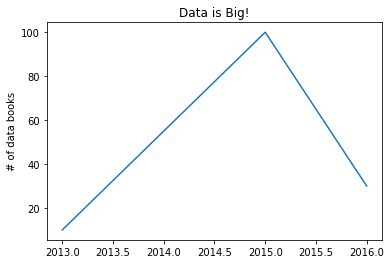

In [127]:
def get_year(book):
    return int(book['date'].split()[-1])

from collections import Counter

year_counts = Counter(get_year(book) for book in books
                     )#if get_year(book) <= 2014)

print(year_counts)

import matplotlib.pyplot as plt

years = sorted(year_counts)
book_counts = [year_counts[year] for year in years]
plt.plot(years, book_counts)
plt.ylabel('# of data books')
plt.title('Data is Big!')
plt.show()